In [99]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

#create normalized/fit array
t = np.arange(0,16,0.1)
normalized = 9.06807e-6 * t**5 - 1.75868e-4 * t**4 - 8.60658e-4 * t**3 + 0.01286 * t**2 + 0.14067 * t - 0.07194

benchmark = 11663*normalized[80]

#function that prints resistor 1 and 2 based off the gain vs. resistor configuration curve of the pmt
def frc(peak):
    gain_v_rc = peak*normalized
    plt.plot(t,gain_v_rc)
    suitable = gain_v_rc[gain_v_rc>=benchmark]
    if len(suitable) < 1:
        print("Bad PMT")
        r1, r2, ideal_gain = 0,0,0
    else:
        best_diff = np.where(abs(suitable - benchmark) == np.min(abs(suitable - benchmark)))
        ideal_gain_loc = np.where(gain_v_rc == suitable[best_diff[0][0]])
        ideal_gain = gain_v_rc[ideal_gain_loc[0][0]]
        r1 = ideal_gain_loc[0][0]*10
        r2 = 1600 - r1
        print("ideal gain at r1 = ",r1," and r2 = ",r2, " is: ",ideal_gain)
    return r1, r2, ideal_gain
    
#make string for the pmt calibration data directory    
path = os.getcwd() + "\\pmt cal data.csv"

#read in the excel sheet to a pandas dataframe
pmt_data = pd.read_csv(path)

ideal gain at r1 =  1280  and r2 =  320  is:  11957.45491639135
ideal gain at r1 =  190  and r2 =  1410  is:  12457.103940019677
ideal gain at r1 =  120  and r2 =  1480  is:  12403.515099832635
ideal gain at r1 =  1410  and r2 =  190  is:  12254.92280076378
ideal gain at r1 =  260  and r2 =  1340  is:  12266.166110441207
ideal gain at r1 =  190  and r2 =  1410  is:  12367.797324429865
ideal gain at r1 =  190  and r2 =  1410  is:  12022.72778356452
ideal gain at r1 =  1150  and r2 =  450  is:  12007.519794116968
ideal gain at r1 =  1170  and r2 =  430  is:  11982.201707188357
ideal gain at r1 =  410  and r2 =  1190  is:  11967.101442843668
ideal gain at r1 =  1210  and r2 =  390  is:  11825.553306205682
ideal gain at r1 =  320  and r2 =  1280  is:  12183.691452879319
ideal gain at r1 =  1170  and r2 =  430  is:  11886.883581155742
ideal gain at r1 =  410  and r2 =  1190  is:  11843.228715294857
ideal gain at r1 =  410  and r2 =  1190  is:  12010.674764091993
ideal gain at r1 =  800  and

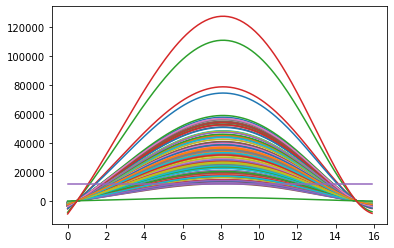

In [101]:
for i in range(len(pmt_data["Peak 800 V"])):
    r1, r2, new = frc(pmt_data["Peak 800 V"][i])
    pmt_data.loc[i,"R1"],pmt_data.loc[i,"R2"],pmt_data.loc[i,"Adjusted Peak 800 V"] = r1,r2,new
plt.plot(t,np.ones(len(t))*11663)

In [102]:
path = os.getcwd() + "\\pmt cal data.csv"    
pmt_data.to_csv(path)

In [29]:
for i in range(len(pmt_data["Peak 800 V"])):
    r1, r2, new = frc(pmt_data["Peak 800 V"][i])
    pmt_data.loc[i,"R1"],pmt_data.loc[i,"R2"],pmt_data.loc[i,"Location"] = r1,r2,new
    
path = os.getcwd() + "\\pmt cal data.csv"    
pmt_data.to_csv(path)
    

In [120]:
r1 = np.array(pmt_data['R1'])
r2 = np.array(pmt_data['R2'])
r = np.append(r1,r2)
df = pd.DataFrame(r, columns=['R'])
df = df.groupby(['R']).size().reset_index(name='Count')
df.to_csv(os.getcwd()+"\\resistor count.csv")

In [111]:
df2

,R2,Count
0,0,1
1,190,1
2,230,2
3,240,2
4,250,4
5,260,3
6,270,7
7,290,1
8,300,1
9,310,1
